In [192]:
import pandas as pd
from plotnine import *
import numpy as np

In [193]:
df = pd.read_csv('outFLcvar.txt', sep=' ', names=['file','it','LB','UB','Gap','FeasCut','OptCut','PartSize','time'])
df['nScen'] = df['file'].str.extract(r'txt_(\d*)_')
df['method'] = df['file'].str.extract(r'_([ampsf]).out')
df['instance'] = df['file'].str.extract(r'FLCVAR_(.*).txt')
det = df['file'].str.split('_', expand=True)
df['family']=det[1]
df['pNumber']=det[2]
df['config']=det[3].str.extract(r'(\d)')

In [194]:
df['instance'].unique()

array(['cap41', 'cap42', 'cap43', 'cap44', 'cap61', 'cap62', 'cap63',
       'cap64', 'cap71', 'cap72', 'cap73', 'cap74'], dtype=object)

In [195]:
#df['time'].isna()
#df['instance'] = pd.Categorical(df['instance'], categories=['cap61','cap62','cap63','cap64','cap101','cap102','cap103','cap104','cap131','cap132','cap133','cap134'])
df['instance'] = pd.Categorical(df['instance'], categories=['cap41','cap42','cap43','cap44','cap61','cap62','cap63','cap64','cap71','cap72','cap73','cap74'])
df['nScen']  = pd.Categorical(df['nScen'], categories=['100','500','1000','5000'])



In [196]:
df.loc[df['time'] > 7200,'time']=7200

In [197]:
df.groupby(['instance','nScen'], dropna=True)['LB'].max()

instance  nScen
cap41     100      6.209572e+05
          500      6.272397e+05
          1000     6.292218e+05
          5000     6.303421e+05
cap42     100      6.130257e+05
          500      6.195779e+05
          1000     6.215214e+05
          5000              NaN
cap43     100      6.127561e+05
          500      6.192873e+05
          1000     6.212033e+05
          5000              NaN
cap44     100      6.127561e+05
          500      6.192873e+05
          1000     6.212033e+05
          5000              NaN
cap61     100      7.048524e+05
          500      7.101091e+05
          1000     7.116988e+05
          5000              NaN
cap62     100      6.842076e+05
          500      6.907198e+05
          1000     6.905071e+05
          5000              NaN
cap63     100      6.791414e+05
          500      6.853837e+05
          1000     6.861827e+05
          5000              NaN
cap64     100      6.788865e+05
          500      6.852801e+05
          1000     6.861

In [198]:
df.groupby(['instance','nScen'])['LB'].var().sort_values(ascending=False)

instance  nScen
cap42     1000     8.704853e-07
cap41     100      0.000000e+00
cap72     100      0.000000e+00
cap64     100      0.000000e+00
          500      0.000000e+00
          1000     0.000000e+00
cap71     100      0.000000e+00
          500      0.000000e+00
          1000     0.000000e+00
cap72     500      0.000000e+00
cap63     500      0.000000e+00
cap72     1000     0.000000e+00
cap73     100      0.000000e+00
          500      0.000000e+00
          1000     0.000000e+00
cap74     100      0.000000e+00
          500      0.000000e+00
cap63     1000     0.000000e+00
          100      0.000000e+00
cap41     500      0.000000e+00
cap44     100      0.000000e+00
cap41     1000     0.000000e+00
cap42     100      0.000000e+00
          500      0.000000e+00
cap43     100      0.000000e+00
          500      0.000000e+00
          1000     0.000000e+00
cap44     500      0.000000e+00
cap62     1000     0.000000e+00
cap44     1000     0.000000e+00
cap61     100      0.000

In [199]:
df['rank']=df.groupby(['nScen','method'])['time'].rank('min')/df['instance'].nunique()


/usr/local/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


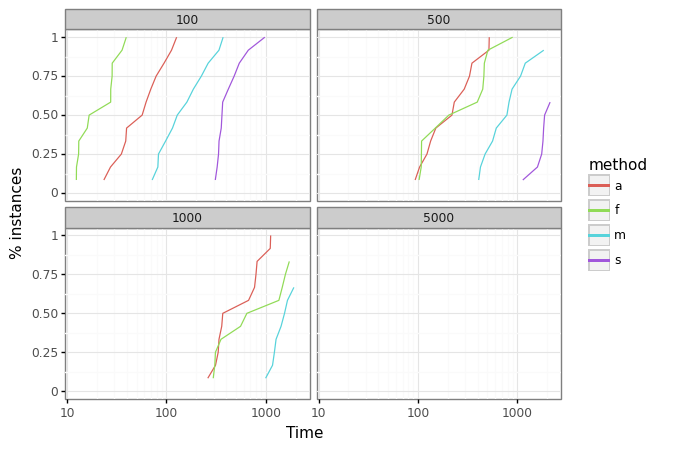

<ggplot: (325533736)>

In [200]:
ggplot(df, aes(x='time', y='rank', color='method', grou='method')) + geom_line() + facet_wrap('nScen')\
+ scale_x_log10()\
+ xlab('Time') + ylab('% instances') + theme_bw() + ylim(0,1)

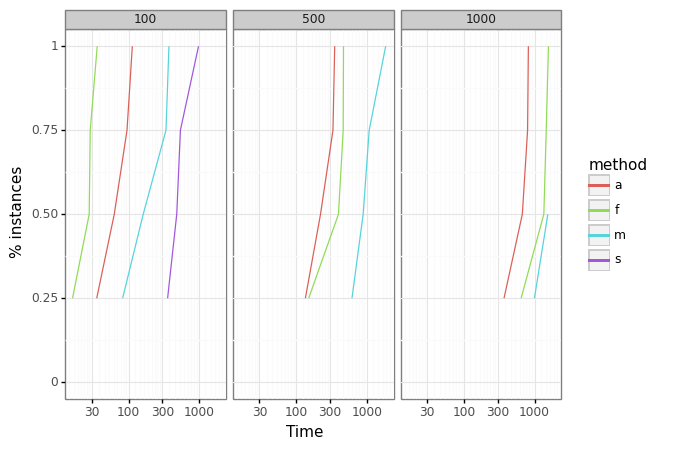

<ggplot: (325646499)>

In [201]:
instances = ['cap61','cap62','cap63','cap64']
df2 = df.loc[df['instance'].isin(instances)].copy()
df2['rank']=df2.groupby(['nScen','method'])['time'].rank('min')/len(instances)
ggplot(df2, aes(x='time', y='rank', color='method', grou='method')) + geom_line() + facet_wrap('nScen')\
+ xlab('Time') + ylab('% instances') + theme_bw() + ylim(0,1)\
+ scale_x_log10()


In [202]:
df.groupby(['instance','nScen'])['LB'].min()

instance  nScen
cap41     100      6.209572e+05
          500      6.272397e+05
          1000     6.292218e+05
          5000     6.303421e+05
cap42     100      6.130257e+05
          500      6.195779e+05
          1000     6.215214e+05
          5000              NaN
cap43     100      6.127561e+05
          500      6.192873e+05
          1000     6.212033e+05
          5000              NaN
cap44     100      6.127561e+05
          500      6.192873e+05
          1000     6.212033e+05
          5000              NaN
cap61     100      7.048524e+05
          500      7.101091e+05
          1000     7.116988e+05
          5000              NaN
cap62     100      6.842076e+05
          500      6.907198e+05
          1000     6.905071e+05
          5000              NaN
cap63     100      6.791414e+05
          500      6.853837e+05
          1000     6.861827e+05
          5000              NaN
cap64     100      6.788865e+05
          500      6.852801e+05
          1000     6.861

In [203]:
df['PartSizeRel'] = df['PartSize']/df['nScen'].astype('int')
df[df['method']=='a'].pivot(index='instance',columns='nScen', values='PartSizeRel')

nScen,100,500,1000,5000
instance,,,,
cap41,0.27,0.160,0.161,0.0942
cap42,0.27,0.140,0.091,NaN
cap43,0.21,0.138,0.154,NaN
cap44,0.21,0.154,0.132,NaN
cap61,0.27,0.176,0.174,NaN
cap62,0.26,0.150,0.177,NaN
cap63,0.24,0.142,0.162,NaN
cap64,0.22,0.162,0.116,NaN
cap71,0.27,0.174,0.179,NaN


In [176]:
df[df['method']=='a'].pivot(index='instance',columns='nScen', values='time')

nScen,16,64,128,1024
instance,,,,
cap61,8.416348,28.096051,46.907841,344.505885
cap62,12.730560,60.070441,53.071692,925.141058
cap63,31.454113,74.743952,90.703671,980.465758
cap64,27.541128,71.111880,104.308586,1295.565983
cap101,829.253186,7200.000000,7200.000000,NaN
cap102,364.521735,1155.770454,1715.045288,NaN
cap103,185.279910,673.614547,1013.340842,NaN
cap104,238.501983,1577.529647,4152.105183,NaN
cap131,7200.000000,7200.000000,7200.000000,NaN


In [51]:
tmp

,perc,variable,value
0,0.000000,a,8.416348
1,0.083333,a,12.730560
2,0.166667,a,27.541128
3,0.250000,a,31.454113
4,0.333333,a,185.279910
5,0.416667,a,238.501983
6,0.500000,a,364.521735
7,0.583333,a,829.253186
12,0.000000,p,15.182542
13,0.083333,p,58.165896


In [45]:
df[(df['instance']=='cap63') & (df['nScen']=='16')]

,file,it,LB,UB,Gap,FeasCut,OptCut,PartSize,time,nScen,method,instance,family,pNumber,config
74,FLCVAR_cap63.txt_16_a.out:FinalReport:,6,675997.666403,675997.666403,0.000000,0,6753,8,31.454113,16,a,cap63,cap63.txt,16,NaN
75,FLCVAR_cap63.txt_16_f.out:FinalReport:,0,675997.666403,675997.666403,0.000000,0,0,0,2.281435,16,f,cap63,cap63.txt,16,NaN
76,FLCVAR_cap63.txt_16_m.out:FinalReport:,1,675997.666403,675997.666403,0.000000,0,6963,16,30.119477,16,m,cap63,cap63.txt,16,NaN
77,FLCVAR_cap63.txt_16_p.out:FinalReport:,6,675997.666403,675986.152205,0.000017,0,3517,7,58.660703,16,p,cap63,cap63.txt,16,NaN
78,FLCVAR_cap63.txt_16_s.out:FinalReport:,1,675997.666403,675997.666403,0.000000,0,3316,16,82.217968,16,s,cap63,cap63.txt,16,NaN


In [32]:
#piv = df[df['time']<86400].pivot(index='instance', columns='method', values='time')
piv = df[df['nScen']=='16'].pivot(index='instance', columns='method', values='time')

In [33]:
piv['aN'] = piv['a']/piv['s']
piv['mN'] = piv['m']/piv['s']
piv['pN'] = piv['p']/piv['s']
#piv['qN'] = piv['q']/piv['s']




<AxesSubplot:>

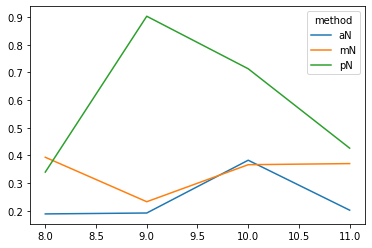

In [34]:
piv.reset_index()[['aN','mN','pN']].plot()

In [36]:
details = pd.read_csv('instanceParam.csv', sep=':', names=['file','detail'])
details['instance'] = details['file'].str.extract(r'(.*).dat')



In [37]:
piv = piv.merge(details, left_index=True, right_on='instance')

In [38]:
piv

,a,f,m,p,s,aN,mN,pN,file,detail,instance


In [39]:
indexSort = piv.sort_values('s')['instance']
piv2 = piv.reset_index()
piv2['instance'] = pd.Categorical(piv2['instance'], categories=indexSort)

In [40]:
ggplot(piv2, aes(x='instance', y='pN', color='detail'))+ geom_point() + scale_y_log10() + geom_hline(yintercept=1)

IndexError: arrays used as indices must be of integer (or boolean) type

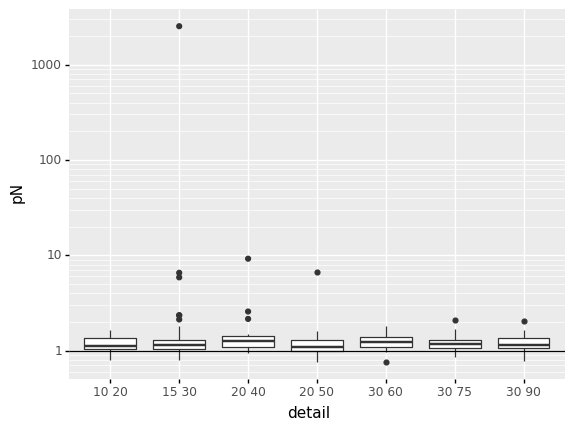

<ggplot: (326328805)>

In [650]:
ggplot(piv2, aes(x='detail',y='pN'))+ geom_boxplot() + scale_y_log10() + geom_hline(yintercept=1)

In [651]:
piv[['aN','mN','pN','instance']].melt(id_vars='instance')

,instance,variable,value
0,EJ_p10_1,aN,8.491788
1,EJ_p10_2,aN,9.647786
2,EJ_p10_3,aN,1.519081
3,EJ_p10_4,aN,2.868630
4,EJ_p11_1,aN,357.918336
...,...,...,...
679,EJ_p8_4,pN,1.294037
680,EJ_p9_1,pN,2523.972973
681,EJ_p9_2,pN,5.867681
682,EJ_p9_3,pN,6.549366


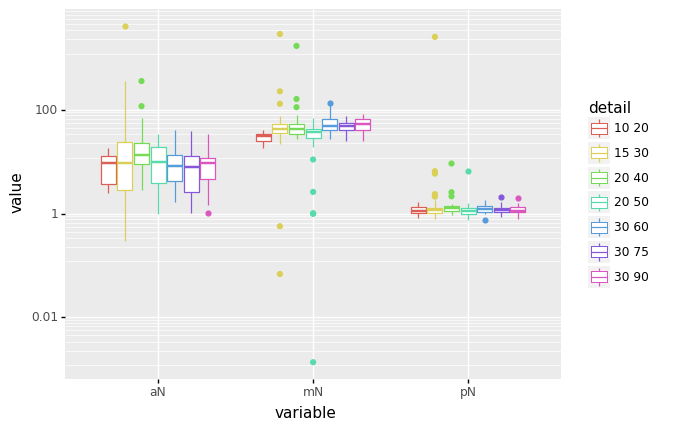

<ggplot: (323517404)>

In [652]:
ggplot(piv[['aN','mN','pN','instance','detail']].melt(id_vars=['instance','detail']),\
       aes(x='variable',y='value', color='detail'))\
    + geom_boxplot()\
    + scale_y_log10()

In [653]:
np.sum(piv['a']<86400)

224

In [654]:
(piv['a'].sort_values(ignore_index=True)).iloc[216]

365.686238

In [655]:
pprof = pd.DataFrame(index=range(len(piv)))
for col in ['a','p','m','s']:
    pprof[col]=(piv[col].sort_values(ignore_index=True))
    # Dejar solo 1 como 86400
    if np.sum(pprof[col]>=86400) > 0:
        idx = np.sum(pprof[col]<86400)
        pprof[col][pprof[col]>=86400] = np.nan
        pprof[col].iloc[idx] = 86400
        
pprof['perc'] = pprof.index/len(piv)

In [656]:
piv = df.pivot(index='instance', columns='method', values='time')

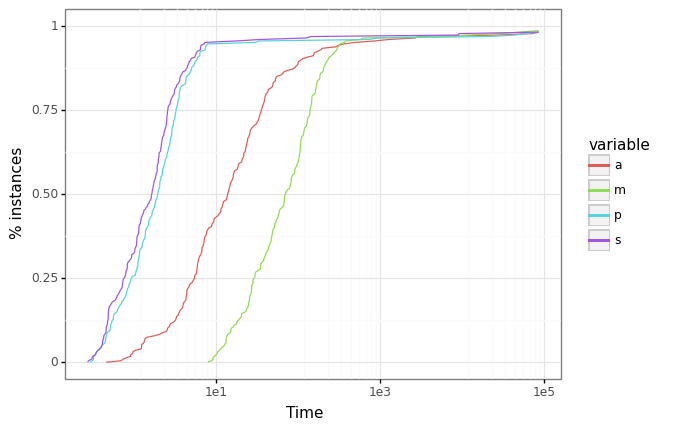

<ggplot: (322562021)>

In [657]:
tmp = pprof.melt(id_vars='perc').dropna()
tmp['value'] = tmp['value'].astype('float')
tmp['variable'] = tmp['variable'].astype('category')
ggplot(tmp, aes(x='value',y='perc',color='variable')) + geom_line() + scale_x_log10()\
+ xlab('Time') + ylab('% instances') + theme_bw() + ylim(0,1)

Check LB similares

In [658]:
tmp2 = (df.groupby('instance')['LB'].std())/(df.groupby('instance')['LB'].mean().abs())
tmp2.sort_values(ascending=False)

instance
EJ_p31_1    0.076205
EJ_p26_1    0.073405
EJ_p31_2    0.041419
EJ_p26_2    0.006062
EJ_p50_2    0.000128
              ...   
EJ_p29_2    0.000000
EJ_p29_3    0.000000
EJ_p29_4    0.000000
EJ_p2_1     0.000000
EJ_p9_4     0.000000
Name: LB, Length: 228, dtype: float64

In [659]:
tmp3 = df[df['time']<86400].groupby('instance')['LB'].agg(['max','min','mean']).reset_index()
tmp3['diff'] = (tmp3['max']-tmp3['min'])/np.abs(tmp3['mean'])

In [660]:
tmp3.sort_values('diff', ascending=False)

,instance,max,min,mean,diff
174,EJ_p50_2,147.84,147.802063,147.830516,2.566250e-04
184,EJ_p52_4,1014.73,1014.510445,1014.674419,2.163798e-04
53,EJ_p22_2,-130.73,-130.740000,-130.737500,7.648915e-05
188,EJ_p53_4,520.49,520.480819,520.487705,1.763923e-05
6,EJ_p11_3,-88.48,-88.480001,-88.480000,1.130199e-08
...,...,...,...,...,...
80,EJ_p29_3,264.94,264.940000,264.940000,0.000000e+00
81,EJ_p29_4,264.94,264.940000,264.940000,0.000000e+00
82,EJ_p2_1,155.99,155.990000,155.990000,0.000000e+00
83,EJ_p2_2,155.99,155.990000,155.990000,0.000000e+00


In [661]:
#df[df['instance']=='EJ_p1_4']
df[df['instance']=='EJ_p50_2']

,file,it,LB,UB,Gap,FeasCut,OptCut,PartSize,time,nScen,method,instance,family,pNumber,config
708,FLBD_EJ_p50_2.dat_100_a.out:FinalReport:,4,147.840000,147.840000,0.0,0,329,92,108.796885,100,a,EJ_p50_2,EJ,p50,2
709,FLBD_EJ_p50_2.dat_100_m.out:FinalReport:,1,147.840000,147.840000,0.0,0,1364,100,301.273522,100,m,EJ_p50_2,EJ,p50,2
710,FLBD_EJ_p50_2.dat_100_p.out:FinalReport:,3,147.802063,147.802063,0.0,0,15,89,5.025780,100,p,EJ_p50_2,EJ,p50,2
711,FLBD_EJ_p50_2.dat_100_s.out:FinalReport:,1,147.840000,147.840000,0.0,0,18,100,5.958075,100,s,EJ_p50_2,EJ,p50,2


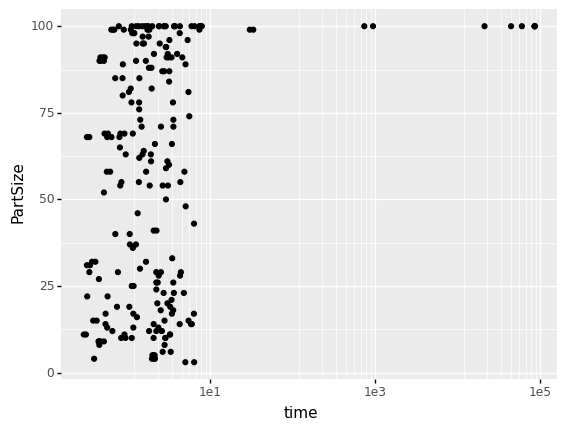

<ggplot: (322561796)>

In [662]:
ggplot(df[df['method']=='p'],aes(x='time',y='PartSize')) + geom_point() + scale_x_log10()

In [663]:
df2 = df.merge(details, on='instance')

In [664]:
df2

,file_x,it,LB,UB,Gap,FeasCut,OptCut,PartSize,time,nScen,method,instance,family,pNumber,config,file_y,detail
0,FLBD_EJ_p10_1.dat_100_a.out:FinalReport:,3,566.94,566.940000,0.000000,0,234,69,4.133208,100,a,EJ_p10_1,EJ,p10,1,EJ_p10_1.dat,15 30
1,FLBD_EJ_p10_1.dat_100_m.out:FinalReport:,1,566.94,566.940000,0.000000,0,700,100,20.486479,100,m,EJ_p10_1,EJ,p10,1,EJ_p10_1.dat,15 30
2,FLBD_EJ_p10_1.dat_100_p.out:FinalReport:,3,566.94,566.940000,0.000000,0,10,69,0.523498,100,p,EJ_p10_1,EJ,p10,1,EJ_p10_1.dat,15 30
3,FLBD_EJ_p10_1.dat_100_s.out:FinalReport:,1,566.94,566.940000,0.000000,0,7,100,0.486730,100,s,EJ_p10_1,EJ,p10,1,EJ_p10_1.dat,15 30
4,FLBD_EJ_p10_2.dat_100_a.out:FinalReport:,3,566.94,566.940000,0.000000,0,242,69,4.433775,100,a,EJ_p10_2,EJ,p10,2,EJ_p10_2.dat,15 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,FLBD_EJ_p9_3.dat_100_s.out:FinalReport:,1,-206.04,-206.042766,0.000013,0,3614,100,9220.890897,100,s,EJ_p9_3,EJ,p9,3,EJ_p9_3.dat,15 30
908,FLBD_EJ_p9_4.dat_100_a.out:FinalReport:,5,-206.04,-206.040000,0.000000,0,14431,100,2684.089876,100,a,EJ_p9_4,EJ,p9,4,EJ_p9_4.dat,15 30
909,FLBD_EJ_p9_4.dat_100_m.out:FinalReport:,1,-206.04,-206.052717,0.000062,0,9494,100,621.658787,100,m,EJ_p9_4,EJ,p9,4,EJ_p9_4.dat,15 30
910,FLBD_EJ_p9_4.dat_100_p.out:FinalReport:,6,-206.04,-206.048364,0.000041,0,4867,100,21276.065560,100,p,EJ_p9_4,EJ,p9,4,EJ_p9_4.dat,15 30


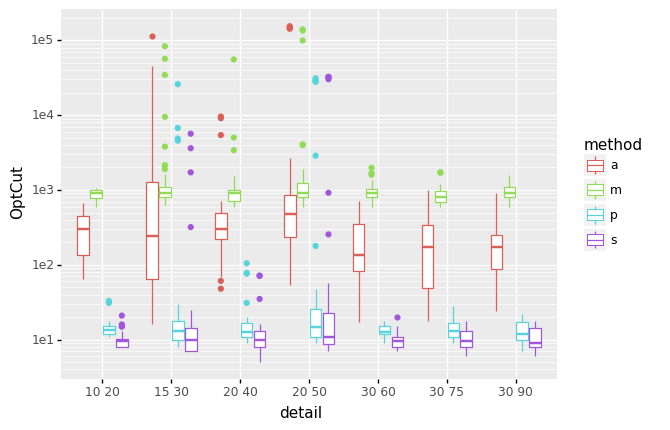

<ggplot: (320965301)>

In [665]:
ggplot(df2.dropna(), aes(x='detail', y='OptCut', color='method')) + geom_boxplot() + scale_y_log10()

In [666]:
df2['Optcut_per_sec'] = df2['OptCut']/df2['time']

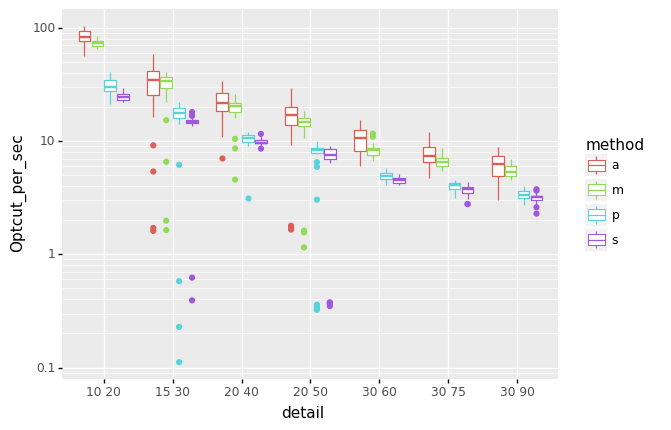

<ggplot: (319682030)>

In [667]:
ggplot(df2.dropna(), aes(x='detail', y='Optcut_per_sec', color='method')) + geom_boxplot() + scale_y_log10()

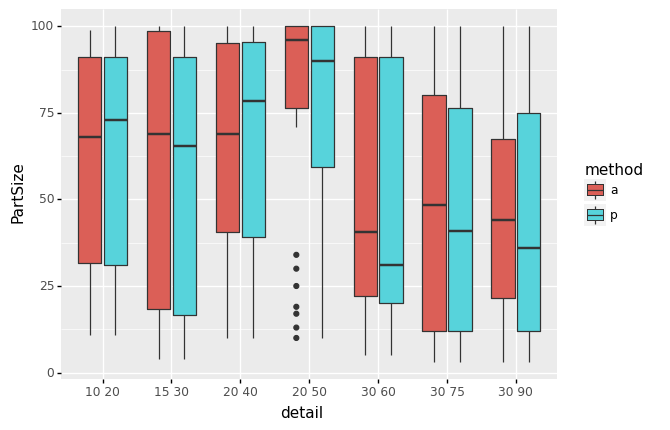

<ggplot: (326019542)>

In [668]:
ggplot(df2[df2['method'].isin(['p','a'])] ,aes(x='detail', y='PartSize', fill='method')) + geom_boxplot()

In [669]:
df[(df['instance'].isin(list(piv.loc[piv['pN']>1,'instance'])))&(df['method']=='p')].sort_values('time')

KeyError: 'pN'